## Monte Carlo method

In [35]:
import gym
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
import numpy as np

In [5]:
%matplotlib inline
plt.style.use('ggplot')

In [7]:
# Now we will create the Blackjack environment using OpenAI gym
env = gym.make('Blackjack-v0')

[2020-02-25 09:43:29,610] Making new env: Blackjack-v0
/home/aims/.local/lib/python3.7/site-packages/gym/envs/registration.py:18: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Now we define the policy function which takes the current state and checks if the score is greater than or equal 2; if it is, we return  or 1 otherwise.

In [8]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score>=20 else 1

We define states,actions, and rewards as list and initiate the environment using **env.reset()**  and store an observation variable

In [13]:
states, actions, rewards = [],[],[]
observation = env.reset()
# append the observation to the state list
states.append(observation)

# We create an action using sample_policy function
#and append the action to actions list

action = sample_policy(observation)
actions.append(action)

# Then for each step in the environment, we store the state,
#reward and done and append the rewards to reward list

observation, reward, done, info = env.step(action)
rewards.append(reward)

Let's write the complete generate_episode function as following

In [19]:
def generate_episode(policy,env):
    states, actions, rewards = [],[],[]
    observation = env.reset()
    while True:
        states.append(observation)
        action = sample_policy(observation)
        actions.append(action)
        observation, reward,done,info = env.step(action)
        rewards.append(reward)
        if done:
            break
    return states, actions, rewards

Getting the value of each state using the first visit MC method

In [32]:
def first_visit_mc_prediction(policy, env, n_episodes):
    value_table = defaultdict(int)
    N = defaultdict(int)
    
    for _ in range(n_episodes):
        states, _, rewards = generate_episode(policy,env)
        returns = 0
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            returns +=R
            if S not in states[:t]:
                N[S] +=1
                value_table[S] += (returns - value_table[S])/ N[S]
    return value_table

In [33]:
value = first_visit_mc_prediction(sample_policy,env,n_episodes=500000)

In [34]:
print(value)

defaultdict(<class 'int'>, {(19, 10, False): -0.7441353963428451, (18, 10, False): -0.7200128877842255, (13, 10, False): -0.5993591427220674, (15, 10, True): -0.38282647584973156, (14, 4, False): -0.598774259448417, (19, 1, False): -0.7911312217194568, (14, 1, False): -0.7083074373316746, (14, 6, False): -0.5962264150943392, (21, 7, False): 0.9207816213361502, (16, 7, False): -0.635347194978421, (12, 7, False): -0.5372030479605568, (21, 1, False): 0.6321202531645577, (17, 1, False): -0.7479385307346313, (20, 10, False): 0.4423929345109128, (15, 10, False): -0.6559129045145822, (12, 4, False): -0.5362030905077274, (10, 4, False): -0.1454068241469817, (20, 8, False): 0.7844499803330228, (16, 8, False): -0.6402157164869047, (20, 3, True): 0.6559139784946239, (21, 10, True): 0.8868984524061875, (13, 8, False): -0.5551797040169144, (20, 7, False): 0.7790651218537769, (11, 7, False): -0.06024626209322773, (7, 7, False): -0.5324407826982485, (20, 9, False): 0.7653235332720807, (18, 9, False):

Here is the complete code

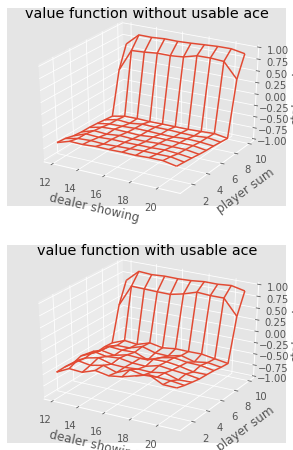

In [41]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score>=20 else 1

def generate_episode(policy,env):
    states, actions, rewards = [],[],[]
    observation = env.reset()
    while True:
        states.append(observation)
        action = sample_policy(observation)
        actions.append(action)
        observation, reward,done,info = env.step(action)
        rewards.append(reward)
        if done:
            break
    return states, actions, rewards

def first_visit_mc_prediction(policy, env, n_episodes):
    value_table = defaultdict(int)
    N = defaultdict(int)
    
    for _ in range(n_episodes):
        states, _, rewards = generate_episode(policy,env)
        returns = 0
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            returns +=R
            if S not in states[:t]:
                N[S] +=1
                value_table[S] += (returns - value_table[S])/ N[S]
    return value_table

def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21+1)
    dealer_show = np.arange(1, 10+1)
    usable_ace = np.array([False,True])
    
    state_values = np.zeros((len(player_sum), 
                           len(dealer_show),
                           len(usable_ace)))
    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k,ace in enumerate(usable_ace):
                state_values[i,j,k] = V[player,dealer,ace]
                
    X , Y = np.meshgrid(player_sum,dealer_show)
    
    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
    for ax in ax1, ax2:
        ax.set_zlim(-1,1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')
fig, axes = pyplot.subplots(nrows=2, figsize = (5,8),
                           subplot_kw = {'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value,axes[0],axes[1])

In [44]:
l  = np.array([1,3,4,5])
np.max(l)

5